In [1]:
import numpy as np
import pandas as pd

from sktime.forecasting.arch import ARCH
from sktime.forecasting.arima import ARIMA
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon
from sktime.split import temporal_train_test_split, ExpandingWindowSplitter, SlidingWindowSplitter, SingleWindowSplitter
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError # Метрики MSE, MAE, MAPE

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)
import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
# from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
# warnings.simplefilter('ignore', category=ValueWarning)
# warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
y = web.DataReader(name='M2', data_source='fred', start='1995-01-01')

<Axes: xlabel='DATE'>

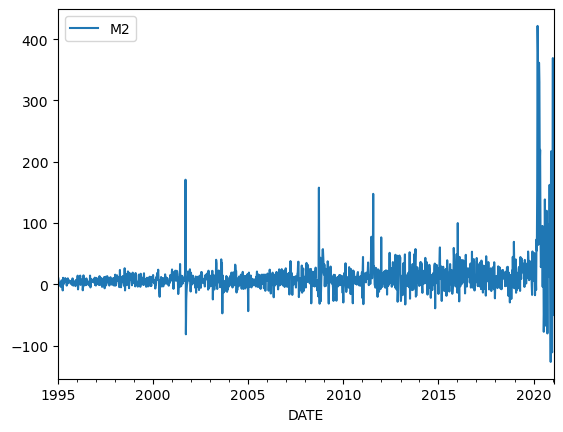

In [3]:
y.diff().plot()

In [4]:
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, power=2)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                       0.024
Mean Model:                        AR   Adj. R-squared:                  0.023
Vol Model:                      GARCH   Log-Likelihood:               -5727.01
Distribution:                  Normal   AIC:                           11464.0
Method:            Maximum Likelihood   BIC:                           11490.1
                                        No. Observations:                 1360
Date:                Sun, Apr 06 2025   Df Residuals:                     1358
Time:                        13:38:44   Df Model:                            2
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          6.0900      1.276      4.774  1.810e-06    [  3.590,  8.591]
None[1]        0.0608  4.831e-02      1.258      0.208 [-3.392e-02,  0.155]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         30.7921     70.102      0.439      0.660 [-1.066e+02,1.682e+02]
alpha[1]       0.4510      0.172      2.625  8.671e-03      [  0.114,  0.788]
beta[1]        0.5490      0.373      1.473      0.141      [ -0.182,  1.280]
=============================================================================

Covariance estimator: robust
"""

In [5]:
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, power=1)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR - AVGARCH Model Results                          
==============================================================================
Dep. Variable:                   None   R-squared:                       0.021
Mean Model:                        AR   Adj. R-squared:                  0.020
Vol Model:                    AVGARCH   Log-Likelihood:               -5722.56
Distribution:                  Normal   AIC:                           11455.1
Method:            Maximum Likelihood   BIC:                           11481.2
                                        No. Observations:                 1360
Date:                Sun, Apr 06 2025   Df Residuals:                     1358
Time:                        13:38:44   Df Model:                            2
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          6.1006      0.417     14.619  2.116e-48     [  5.283,  6.918]
None[1]        0.0571  4.358e-03     13.090  3.755e-39 [4.851e-02,6.559e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.4243      2.274      1.066      0.286 [ -2.033,  6.881]
alpha[1]       0.4367      0.138      3.160  1.576e-03 [  0.166,  0.708]
beta[1]        0.5633      0.207      2.715  6.622e-03 [  0.157,  0.970]
========================================================================

Covariance estimator: robust
"""

In [6]:
forecaster = ARCH(mean='AR', lags=2, vol='GARCH', p=1, q=1, power=2)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                       0.035
Mean Model:                        AR   Adj. R-squared:                  0.034
Vol Model:                      GARCH   Log-Likelihood:               -5723.14
Distribution:                  Normal   AIC:                           11458.3
Method:            Maximum Likelihood   BIC:                           11489.6
                                        No. Observations:                 1359
Date:                Sun, Apr 06 2025   Df Residuals:                     1356
Time:                        13:38:44   Df Model:                            3
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          5.7899      1.431      4.047  5.182e-05    [  2.986,  8.594]
None[1]        0.0623  4.780e-02      1.304      0.192 [-3.133e-02,  0.156]
None[2]        0.0417  4.994e-02      0.834      0.404 [-5.621e-02,  0.140]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         30.6415     68.542      0.447      0.655 [-1.037e+02,1.650e+02]
alpha[1]       0.4524      0.164      2.755  5.868e-03      [  0.131,  0.774]
beta[1]        0.5476      0.359      1.525      0.127      [ -0.156,  1.251]
=============================================================================

Covariance estimator: robust
"""

In [7]:
forecaster = ARCH(mean='AR', lags=2, vol='GARCH', p=1, q=1, power=1)  #power = lambda
forecaster.fit(y.diff().dropna())

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          AR - AVGARCH Model Results                          
==============================================================================
Dep. Variable:                   None   R-squared:                       0.056
Mean Model:                        AR   Adj. R-squared:                  0.055
Vol Model:                    AVGARCH   Log-Likelihood:               -5717.04
Distribution:                  Normal   AIC:                           11446.1
Method:            Maximum Likelihood   BIC:                           11477.4
                                        No. Observations:                 1359
Date:                Sun, Apr 06 2025   Df Residuals:                     1356
Time:                        13:38:44   Df Model:                            3
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          5.3647      0.597      8.983  2.625e-19    [  4.194,  6.535]
None[1]        0.0864  4.458e-02      1.939  5.256e-02 [-9.566e-04,  0.174]
None[2]        0.0721  3.309e-02      2.179  2.932e-02  [7.251e-03,  0.137]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.4004      2.275      1.055      0.291 [ -2.058,  6.859]
alpha[1]       0.4364      0.140      3.124  1.787e-03 [  0.163,  0.710]
beta[1]        0.5636      0.209      2.697  7.001e-03 [  0.154,  0.973]
========================================================================

Covariance estimator: robust
"""

In [8]:
y = y.to_period('W-Fri')

In [9]:
# зададим горизонт прогнозирования и частотность
fh = ForecastingHorizon(np.arange(1,11), freq ='W-Fri')

y_pred = forecaster.fit_predict(y=y, fh=fh)

y_pred

,M2
2021-02-06/2021-02-12,19385.071517
2021-02-13/2021-02-19,19405.809012
2021-02-20/2021-02-26,19426.580580
2021-02-27/2021-03-05,19447.374806
2021-03-06/2021-03-12,19468.191944
2021-03-13/2021-03-19,19489.032015
2021-03-20/2021-03-26,19509.895045
2021-03-27/2021-04-02,19530.781059
2021-04-03/2021-04-09,19551.690082
2021-04-10/2021-04-16,19572.622140


In [10]:
# прогноз волатильности
forecaster.predict_var(fh=fh)

2021-02-06/2021-02-12     5421.971750
2021-02-13/2021-02-19    11946.902735
2021-02-20/2021-02-26    17242.558069
2021-02-27/2021-03-05    21380.126466
2021-03-06/2021-03-12    25527.046410
2021-03-13/2021-03-19    29899.549353
2021-03-20/2021-03-26    33286.984786
2021-03-27/2021-04-02    37811.866415
2021-04-03/2021-04-09    41634.881081
2021-04-10/2021-04-16    45282.545006
Freq: W-FRI, dtype: float64

forecaster = ARCH(mean='AR', lags=2, vol='GARCH', p=1, q=1, power=1) предпочтительнее так как у неё AIC и BIC меньше чем у других

In [11]:
len(y)

1362

In [13]:
# специфицируем модель для прогнозирования, например ARIMA(2,1,2) без сноса
forecaster = ARIMA(order=(1,0,1), trend='ct')

# разбиваем выбору на обучающую (длины initial_window) и тестовую (параметр fh)
# далее обучающую и тестовую сдвигаем на step_length шагов
cv_strategy = SlidingWindowSplitter(fh=np.arange(1, 11), initial_window=100, step_length=10)

# инициализируем метрики
metric = [MeanSquaredError(square_root=False), MeanAbsoluteError(), MeanAbsolutePercentageError()]

cv_res = evaluate(forecaster=forecaster, y=y, cv=cv_strategy, strategy="refit", return_data=False, scoring=metric)
cv_res

,test_MeanSquaredError,test_MeanAbsoluteError,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,90.193200,9.097239,0.002378,2.398852,0.018724,100,1996-11-23/1996-11-29
1,82659.413181,276.611677,0.071617,0.162402,0.014467,10,1997-02-01/1997-02-07
2,44698.893827,207.843445,0.053384,0.158532,0.016180,10,1997-04-12/1997-04-18
3,175.374553,9.979622,0.002523,0.141266,0.017958,10,1997-06-21/1997-06-27
4,1561.101875,37.272759,0.009340,0.098382,0.015597,10,1997-08-30/1997-09-05
...,...,...,...,...,...,...,...
121,316520.685129,378.937305,0.023030,0.153563,0.017423,10,2020-02-01/2020-02-07
122,62096.664049,223.912535,0.012578,0.182041,0.015956,10,2020-04-11/2020-04-17
123,546568.235402,667.841789,0.036412,0.228784,0.026640,10,2020-06-20/2020-06-26
124,54580.114642,218.303452,0.011649,0.154054,0.021590,10,2020-08-29/2020-09-04


In [14]:
# средняя MSE, MAE, MAPE
cv_res.iloc[:,:len(metric)].mean()

test_MeanSquaredError               2.265598e+07
test_MeanAbsoluteError              9.493454e+02
test_MeanAbsolutePercentageError    1.140020e-01
dtype: float64